# Week 4 Lab: MNIST - Handwritten digits database

## Overview

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. MNIST is like the "Hello World" of machine learning with which you can try out a few machine learning algorithms.

![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)


For easy to understand how this data set was built, I get an example image, which contains number 7, from mist.
1. Resize it from 28x28 to 10X10 and make diagram. Each pixel in image contains value from 0 to 255. The greater the number, the whiter the color. That is the way how people encode the image. [Link](https://www.scan2cad.com/tips/bitmap-vs-vector/) for further information.
2. Because each observation should be one line in dataset so we reshape 2-D array to 1-D array. Using 1-D array as feature vector and label it. In our case, it's 7.
3. Do it again with the other images from mist. We will have a table with feature vector and label. Take a close look at first and third observation. The pattern of them are much similar than second observation. Base on this thing, we hope that can build a model that classify a number using feature vector.

Let's do it.
![Imgur](https://i.imgur.com/wtFCKS3.jpg)

## TODO
1. Read dataset
    - Dataset is too large (42000 observation) for some computer. To make it easy to handle, we get 5000 sample from origin dataset
    - Split data set into train and test set
2. Visualization
    - Visualization helps you understand more about data set. Grab an observation and visualize it.
3. Modeling
    - We try with 2 tree base model:
        - Decision Tree
        - Random Forest
4. Evaluate model
    - Calculate accuracy, precision, recall, f1 score with each model.
    - Random Forest vs Decision Tree, which one is better.
5. Fine Tune
    - Random Forest has many hyper parameters that we have to choose, so which combination is bet fit with our data set? Using gridsearchCV to find it.

## 1. Read dataset

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Import dataset
data = pd.read_csv("data/train.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
# For easy to handle, we use a small pice of dataset
# Ramdomly choose 5000 rows for now
data.sample(5000)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
38792,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25659,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11081,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38578,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27713,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3400,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4220,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1814,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23694,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24526,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Let's take a look at first 5 rows ()
data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


You can see that each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning lighter. This pixel-value is an integer between 0 and 255, inclusive.

Visually, if we omit the "pixel" prefix, the pixels make up the image like this:
```
000 001 002 003 ... 026 027
028 029 030 031 ... 054 055
056 057 058 059 ... 082 083
 |   |   |   |  ...  |   |
728 729 730 731 ... 754 755
756 757 758 759 ... 782 783 
```
![image](https://i.imgur.com/lFxwGOf.png=500x500)

In [6]:
# Let's list all unique values are there in 'label'
# We expect to see a list from 0 to 9
data['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

In [14]:
# Let's defines X and y for train_test_split 
# y should be values of the column 'label' and X should contain the rest (784 pixel columns)
y = data['label']
X = data.loc[:, data.columns != 'label']

In [37]:
# Train test split
# Let's split X and y to X_train, y_train, X_test, y_test with 25% test size and random state 101
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.25, random_state=10, stratify=y)

/Users/huynhducduy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## 2. Visualization

Label: 1


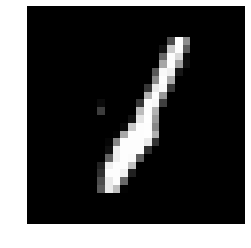

In [36]:
# Now let's convert some example of our data back to image
# Let's start with choosing a random integer number called 'index', your choice but it shouldn't be greater than 5000
# Let's print out y_train[index] which is the number of the image
# Using plt.imshow(img, cmap='gray') we can plot the image. But img here should be 28x28 in height and width.
# So before plotting we need to transform the vector X_train[index] into 28x28 Matrix with the function reshape()
# Here is an example:
# a = np.arange(6).reshape((3, 2))
# >>> a
# array([[0, 1],
#        [2, 3],
#        [4, 5]])
# Now we try to look at the number with index is 36, you can try with different index for exp: 30, 49
y_train

index = 18975

print("Label: " + str(y_train[index]))
plt.imshow(X_train.loc[index].to_numpy().reshape((28,28)),cmap='gray')
plt.axis('off')
plt.show()

## 3. Modeling

In [ ]:
# Random Forest & Decision Tree
# Let's define two classifier called rfc and dtc represent RandomForestClassifier and DecisionTreeClassifier

import sklearn.model_selection import Ran

In [ ]:
# Let's fit training data to Random Forest Classifier
# Your code here


In [ ]:
# Let's fit training data to Decision Tree Classifier
# Your code here


## 4. Evaluate model

In [ ]:
# Let's apply our models to testing set and take a look at accuracy score first
# Random Forest model
# Your code here



In [ ]:
# Decision Tree model
# Your code here



In [ ]:
# Remember seaborn with its amazing heatmap()? 
# Actually we can use heatmap() to visualize the confustion matrix
# Just for example about the style of heatmap: cmap="YlGnBu", annot=True, fmt="d"

# Let's plot the heatmap for confusion matrix of Random Forest model
# Your code here




In [ ]:
# And heatmap for confusion matrix of Decision Tree model
# Your code here



## 5. Fine Tune
[Further reading](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)

In [ ]:
# Base on the accuracy score we decide to take Random Forest as our Classifier and we're going to improve it
# Now let's take a look at the parameter 'n_estimators' which is the number of trees in the forest
# Do you think the more tree we have the better our model will be?

# Let's plot the correlation between n_estimators and accuracy
# Define an array of number called 'n', n should be set of 'n_estimators' that we're going to test
n = [1 ,5 ,10, 20, 50, 100, 200, 500]
# Define a 'result' array to save the accuracy score of each trial
result = []
# Using a for-loop which goes through n
# Inside the loop we will define a new RandomForestClassifier model with appropriate 'n_estimators'
# Then apply that model on X_test and calculate the accuracy score then save it into 'result'
# Your code here
for i in n:
    clf = RandomForestClassifier(# Your code here)
    clf.fit(# Your code here)
    predictions = clf.predict(# Your code here)
    result.append(accuracy_score(# Your code here))    
# Last step let's plot n and result on a grid using plt.scatter()
plt.scatter(# Your code here)
print(result)

## Great job!